In [ ]:
# https://jaketae.github.io/study/MCMC/
# https://github.com/ritvikmath/YouTubeVideoCode/blob/main/MCMC%20Experiments.ipynb

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def p(x):
    return norm.pdf(x, loc=30, scale=10) + norm.pdf(x, loc=80, scale=20) + norm.pdf(x, loc=90, scale=20)

In [3]:
def q(x):
    return norm.pdf(x, loc=50, scale=30)

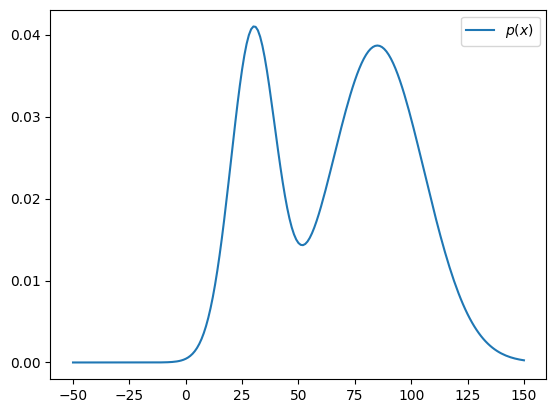

In [4]:
x = np.arange(-50, 151)
fig, ax = plt.subplots()
ax.plot(x, p(x), label=r"$p(x)$")
# ax.plot(x, q(x), label=r"$q(x)$")
plt.legend()
plt.show()

In [5]:
def sample(size):
    accepted_samples = [1]
    for _ in range(size):
        candidate = np.random.normal(accepted_samples[-1], 4)
        prob = min(1, p(candidate) / p(accepted_samples[-1]))
        if np.random.random() < prob:
            accepted_samples.append(candidate)
        else:
            accepted_samples.append(accepted_samples[-1])

    return accepted_samples

C:\Users\qwertyforce\AppData\Local\Temp\ipykernel_28632\1793685963.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples)


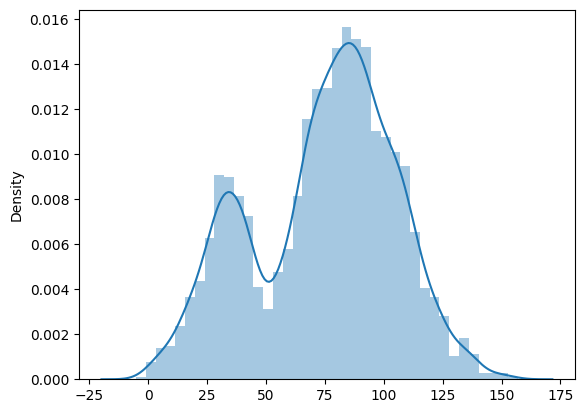

In [7]:
samples = sample(10000)
samples=samples[1000:]
sns.distplot(samples)
plt.show()